### Fast Face Detection with Mediapipe (60+ FPS with CPU) ###

In [1]:
# ref: https://www.youtube.com/watch?v=V9bzew8A1tc&ab_channel=Murtaza%27sWorkshop-RoboticsandAI

In [4]:
import numpy as np
import time
import cv2
import mediapipe as mp

In [5]:
import sys
sys.path.append('C:/Users/Mafeus/Desktop/Git_Repos/OpenCV')
import OpCV_Utils

In [6]:
# Creating Objects Instances:
mpFaceDetection = mp.solutions.face_detection
mpDraw = mp.solutions.drawing_utils
faceDetection = mpFaceDetection.FaceDetection(0.45)

In [9]:
# Load Video:
video = 'C:/Users/Mafeus/Desktop/Git_Repos/OpenCV/Testing Grounds/ztest_media/people.mp4'
cap = cv2.VideoCapture(video)
video_fps = cap.get(cv2.CAP_PROP_FPS)

while True:
    
    start = time.time()
    
    success, frame = cap.read()
    
    if not success:
        print('Server OFF')
        break
        
    frame = cv2.resize(frame, (600,500))
    
    ###############################################################################################################
    
    frameRGB = cv2.cvtColor(frame.copy(), cv2.COLOR_BGR2RGB)
    results = faceDetection.process(frameRGB)
    
    if results.detections:
        for id, detection in enumerate(results.detections):
            # mpDraw.draw_detection(frame, detection)
            bboxC = detection.location_data.relative_bounding_box
            
            H, W, C = frame.shape
            bbox = int(bboxC.xmin*W), int(bboxC.ymin*H), \
                   int(bboxC.width*W), int(bboxC.height*H)
                        
            (x, y) = (bbox[0], bbox[1])
            (w, h) = (bbox[2], bbox[3])
                            
            text = "Face{}: {:.2f}%".format((id+1), detection.score[0]*100)
            color = (255,0,0)
            
            frame = drawBoundingBox(frame, x, y, w, h, text, color)
                  
    ###############################################################################################################
    
    end = time.time()

    frame_time = (end - start) + 0.0001
    fps = np.floor(1/frame_time)
        
    #if (fps > video_fps):
     #   time.sleep(1/video_fps)
      #  fps = video_fps
            
    cv2.putText(frame, "FPS: {}".format(fps), (30,20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    
    # Keyboard Controls:
    
    key = cv2.waitKey(1) or 0xff   
        
    if key == ord('k'):
        break
    
    cv2.imshow("Video", frame)
    
cv2.destroyAllWindows()
cap.release()

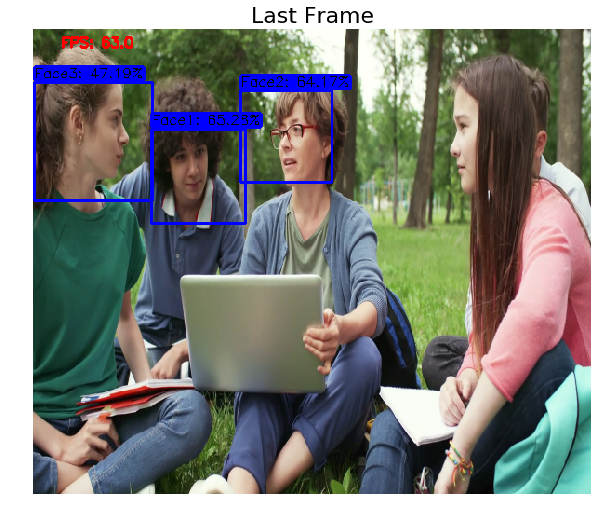

In [10]:
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
OpCV_Utils.show_single_img_plt(frame, 'Last Frame', fig_size = (10,15))

In [ ]:
# 63 FPS with CPU!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [8]:
def drawBoundingBox(img, x, y, w, h, text, color):
    
    # add litle background to class name info:
    backg = np.full((img.shape), (0,0,0), dtype=np.uint8)
    cv2.putText(backg, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2)
    fx,fy,fw,fh = cv2.boundingRect(backg[:,:,2])
                
    # Draw obj bbox:
    cv2.rectangle(img, (x, y), (x + w, y + h), color, 2) 
    cv2.rectangle(img, (fx, fy), (fx + fw, fy + fh), color, -1) 
    cv2.rectangle(img, (fx, fy), (fx + fw, fy + fh), color, 3) 
    cv2.putText(img, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1)
    
    return img
    